- random forest use bootstraping and random feature selection
- random forest classifier use mode at aggregations step (combining all decision trees outcomes)

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
x = df.iloc[ : ,:-1]
y = df.iloc[ : ,-1:]

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(x,y)

model.predict([[1,1,1,3]])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
predictions = model.predict(x_test)
predictions

array(['virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor'], dtype=object)

In [10]:
score = model.score(x_test, y_test)
print("Tha score is: ",score)

Tha accuracy is:  1.0


In [15]:
from sklearn import metrics
print("Accuracy is: ",metrics.accuracy_score(predictions, y_test))

Accuracy is:  1.0


In [16]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[ 9,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 16]], dtype=int64)

Text(0.5, 14.722222222222216, 'Predicted output')

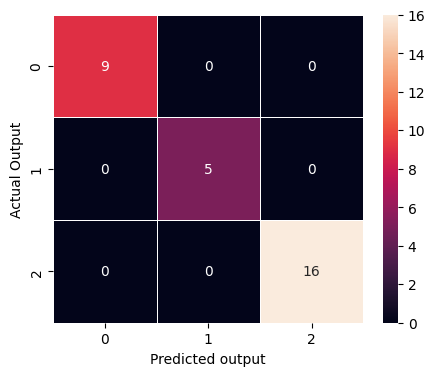

In [25]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, linewidth=.5)
plt.ylabel("Actual Output")
plt.xlabel("Predicted output")